# Lumped Conceptual Model

- please change the Path to the directory where you stored the case study data

In [12]:
import os
Comp = "F:/01Algorithms/Hydrology/HAPI/Examples"
os.chdir(Comp)
#os.listdir(Path)

### Import Modules

In [13]:
import datetime as dt
import matplotlib.pyplot as plt


import Hapi.rrm.hbv_bergestrom92 as HBVLumped
from Hapi.run import Run
from Hapi.catchment import Catchment
from Hapi.rrm.routing import Routing
import Hapi.statistics.performancecriteria as PC

### Paths

In [14]:
Parameterpath = Comp + "/data/lumped/Coello_Lumped2021-03-08_muskingum.txt"
MeteoDataPath = Comp + "/data/lumped/meteo_data-MSWEP.csv"
Path = Comp + "/data/lumped/"

### Meteorological data

In [15]:
start = "2009-01-01"
end = "2011-12-31"
name = "Coello"
Coello = Catchment(name, start, end)
Coello.ReadLumpedInputs(MeteoDataPath)

Lumped Model inputs are read successfully


### Lumped model

In [16]:
# catchment area
AreaCoeff = 1530
# [Snow pack, Soil moisture, Upper zone, Lower Zone, Water content]
InitialCond = [0,10,10,10,0]

Coello.ReadLumpedModel(HBVLumped, AreaCoeff, InitialCond)

Lumped model is read successfully


### Model Parameters

In [17]:
Snow = 0 # no snow subroutine
Coello.ReadParameters(Parameterpath, Snow)

Parameters are read successfully


In [26]:
Coello.Parameters

[0.7,
 51.1726422,
 1.147999,
 0.1,
 0.88137,
 0.82353,
 0.35651,
 0.03223,
 47.426,
 5.2744,
 1.0,
 0.2]

### Observed flow

In [18]:
Coello.ReadDischargeGauges(Path + "Qout_c.csv", fmt="%Y-%m-%d")

Gauges data are read successfully


- the discharge data should be stored in the text file with the date stored in the first column and the discharge values in the second column

### Routing

In [19]:
# RoutingFn = Routing.TriangularRouting2
RoutingFn = Routing.Muskingum_V
Route = 1

Model Run has finished


### Run The Model

In [20]:
Run.RunLumped(Coello, Route, RoutingFn)

Model Run has finished


### Calculate performance criteria

In [21]:
Metrics = dict()

# gaugeid = Coello.QGauges.columns[-1]
Qobs = Coello.QGauges['q']

Metrics['RMSE'] = PC.RMSE(Qobs, Coello.Qsim['q'])
Metrics['NSE'] = PC.NSE(Qobs, Coello.Qsim['q'])
Metrics['NSEhf'] = PC.NSEHF(Qobs, Coello.Qsim['q'])
Metrics['KGE'] = PC.KGE(Qobs, Coello.Qsim['q'])
Metrics['WB'] = PC.WB(Qobs, Coello.Qsim['q'])

print("RMSE= " + str(round(Metrics['RMSE'],2)))
print("NSE= " + str(round(Metrics['NSE'],2)))
print("NSEhf= " + str(round(Metrics['NSEhf'],2)))
print("KGE= " + str(round(Metrics['KGE'],2)))
print("WB= " + str(round(Metrics['WB'],2)))

RMSE= 26.03
NSE= 0.01
NSEhf= 0.17
KGE= 0.54
WB= 96.55


### Plot Hydrograph

(<Figure size 432x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Lumped Model'}, xlabel='Time', ylabel='Discharge m3/s'>)

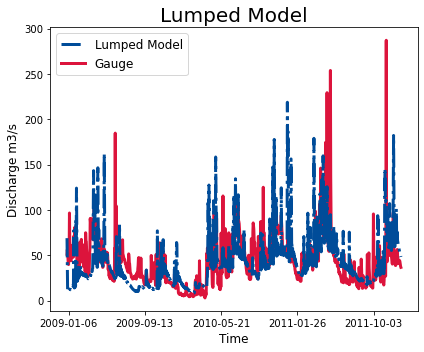

In [22]:
gaugei = 0
plotstart = "2009-01-01"
plotend = "2011-12-31"
Coello.PlotHydrograph(plotstart, plotend, gaugei, Title= "Lumped Model")

### Save Results

In [23]:
StartDate = "2009-01-01"
EndDate = "2010-04-20"

Path = SaveTo + "Results-Lumped-Model" + str(dt.datetime.now())[0:10] + ".txt"
Coello.SaveResults(Result=5, StartDate=StartDate, EndDate=EndDate, Path=Path)

Data is saved successfully
